# Custom Training with YOLOv5

In this tutorial, we assemble a dataset and train a custom YOLOv5 model to recognize the objects in our dataset. To do so we will take the following steps:

* Gather a dataset of images and label our dataset
* Export our dataset to YOLOv5
* Train YOLOv5 to recognize the objects in our dataset
* Evaluate our YOLOv5 model's performance
* Run test inference to view our model at work



![](https://uploads-ssl.webflow.com/5f6bc60e665f54545a1e52a5/615627e5824c9c6195abfda9_computer-vision-cycle.png)

# Step 1: Install Requirements

In [4]:
import os
os.listdir()
%cd CurrentProject

[WinError 2] The system cannot find the file specified: 'CurrentProject'
c:\Users\gvina\OneDrive\Documents\GitHub\CurrentProject


In [5]:
#clone YOLOv5 and 
#!git clone https://github.com/ultralytics/yolov5  # clone repo
!git clone https://github.com/IronBanes/yolov5Modified
%cd yolov5Modified


c:\Users\gvina\OneDrive\Documents\GitHub\CurrentProject\yolov5Modified


fatal: destination path 'yolov5Modified' already exists and is not an empty directory.


In [6]:
%pip install -r requirements.txt 
# install dependencies
%pip install -q roboflow

import torch
import os
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import imutils
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Setup complete. Using torch 2.0.1+cpu (CPU)


In [ ]:
!nvidia-smi


# Step 2: Assemble Our Dataset

In order to train our custom model, we need to assemble a dataset of representative images with bounding box annotations around the objects that we want to detect. And we need our dataset to be in YOLOv5 format.

In Roboflow, you can choose between two paths:

* Convert an existing dataset to YOLOv5 format. Roboflow supports over [30 formats object detection formats](https://roboflow.com/formats) for conversion.
* Upload raw images and annotate them in Roboflow with [Roboflow Annotate](https://docs.roboflow.com/annotate).

# Annotate

![](https://roboflow-darknet.s3.us-east-2.amazonaws.com/roboflow-annotate.gif)

# Version

![](https://roboflow-darknet.s3.us-east-2.amazonaws.com/robolfow-preprocessing.png)


IF ON COLAB

In [ ]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

IF NOT ON COLAB

In [7]:
# set up environment
os.environ["DATASET_DIRECTORY"] = "../datasets"

In [8]:
%pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="NLWDftGgBl2cL6icEIu5")
project = rf.workspace("mlproject-iqfav").project("mlproject-cqr3c")
dataset = project.version(2).download("yolov5")


Note: you may need to restart the kernel to use updated packages.
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to ../datasets/MLProject-2 in yolov5pytorch:: 100%|██████████| 622/622 [00:00<00:00, 1334.95it/s]


# Step 3: Train Our Custom YOLOv5 model

Here, we are able to pass a number of arguments:
- **img:** define input image size
- **batch:** determine batch size
- **epochs:** define the number of training epochs. (Note: often, 3000+ are common here!)
- **data:** Our dataset locaiton is saved in the `dataset.location`
- **weights:** specify a path to weights to start transfer learning from. Here we choose the generic COCO pretrained checkpoint.
- **cache:** cache images for faster training

In [ ]:
!python train.py --img 640 --batch 16 --epochs 300 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

# Evaluate Custom YOLOv5 Detector Performance
Training losses and performance metrics are saved to Tensorboard and also to a logfile.

If you are new to these metrics, the one you want to focus on is `mAP_0.5` - learn more about mean average precision [here](https://blog.roboflow.com/mean-average-precision/).

In [ ]:
# Start tensorboard
# Launch after you have started training
# logs save in the folder "runs"
%load_ext tensorboard
%tensorboard --logdir runs

#Run Inference  With Trained Weights
Run inference with a pretrained checkpoint on contents of `test/images` folder downloaded from Roboflow.

In [10]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 640 --conf 0.5 --source {dataset.location}/test/images 

requirements: C:\Users\gvina\OneDrive\Documents\GitHub\CurrentProject\requirements.txt not found, check failed.
bounding box is  308 314 334 330
class index is  tensor(0.)
detected object name is  license

bounding box is  535 407 574 435
class index is  tensor(0.)
detected object name is  license

bounding box is  192 366 436 523
class index is  tensor(0.)
detected object name is  license

bounding box is  229 554 266 573
class index is  tensor(0.)
detected object name is  license

bounding box is  610 600 640 621
class index is  tensor(0.)
detected object name is  license

bounding box is  96 369 186 439
class index is  tensor(0.)
detected object name is  license

bounding box is  132 545 270 602
class index is  tensor(0.)
detected object name is  license

bounding box is  136 258 450 340
class index is  tensor(0.)
detected object name is  license

bounding box is  245 310 396 373
class index is  tensor(0.)
detected object name is  license

bounding box is  255 340 382 438
class inde

detect: weights=['runs/train/exp/weights/best.pt'], source=c:\Users\gvina\OneDrive\Documents\GitHub\CurrentProject\datasets\MLProject-2/test/images, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  fc753ca Python-3.11.1 torch-2.0.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/27 C:\Users\gvina\OneDrive\Documents\GitHub\CurrentProject\datasets\MLProject-2\test\images\Cars121_png.rf.164005aa7e0a199ab997a765934b921d.jpg: 640x640 2 licenses, 211.8ms
image 2/27 C:\Users\gvina\OneDrive\Documents\GitHub\CurrentProject\datasets\MLProject-2\test\images\Cars12_png.rf.f5cb0c21f6a1b6b75277d

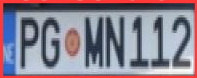

In [11]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('../images/*.png'): #assuming PNG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.png'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
def resize_cvimage(imageName):
    imageName = cv.resize(imageName, None, fx = 3, fy = 3)
    return imageName

def resize_pilimage(image):
    h, w = image.size
    h *= 3
    w *= 3
    newsize = (h,w)
    image = image.resize(newsize)
    return image

In [ ]:
def grayscale_image(imageName):
    gray_mono = cv.cvtColor(imageName ,cv.COLOR_RGB2GRAY)
    return gray_mono 

def blurred_image(imageName):
    blurred_gray = cv.bilateralFilter(imageName, 10, 50, 50)
    return blurred_gray

def threshold_image(imageName):
    edged = cv.Canny(imageName, 140, 200) 
    return edged

In [13]:
%pip install pytesseract
#%pip install easyocr

Note: you may need to restart the kernel to use updated packages.


In [17]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

../images\Cars1_png.rf.6510fc54e061b060da1f4c2c2f9727e6.picture_1.jpg


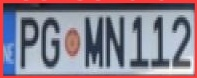

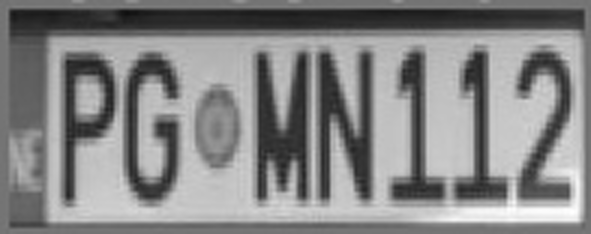

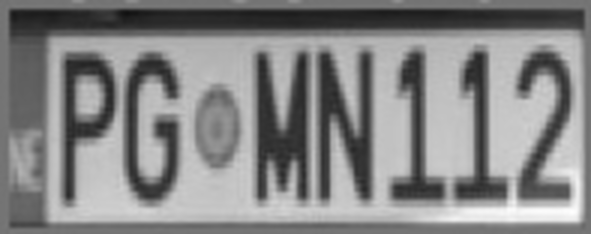

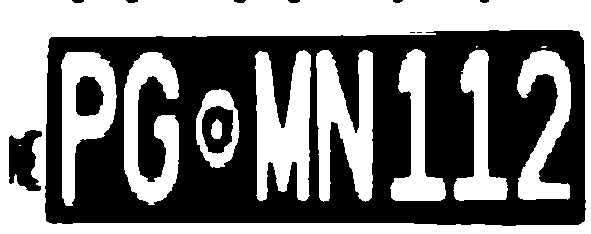

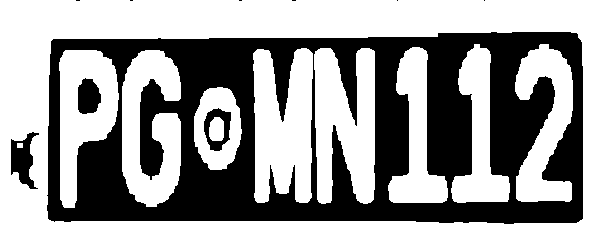

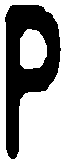

plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
p

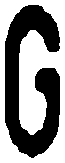

plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
p

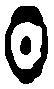

plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
p

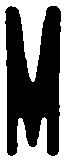

plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
p

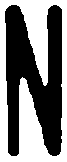

plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
p

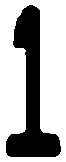

plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
p

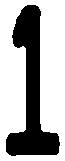

plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
plate_num:  
clean_text:  
p

In [18]:
import glob
from PIL import Image
from IPython.display import display
import pytesseract
import re

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

for imageName in glob.glob("../images/*.jpg"):
    #img = Image.open(imageName)
    print(imageName)
    img = Image.open(imageName).convert('RGB')
    img = np.asarray(img)

    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    # resize image to three times as large as original for better readability
    gray = cv.resize(gray, None, fx = 3, fy = 3, interpolation = cv.INTER_CUBIC)
    # perform gaussian blur to smoothen image
    blur = cv.GaussianBlur(gray, (5,5), 0)
    #cv.imshow("Gray", gray)
    #cv.waitKey(0)
    # threshold the image using Otsus method to preprocess for tesseract
    ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_OTSU | cv.THRESH_BINARY_INV)
    
    rect_kern = cv.getStructuringElement(cv.MORPH_RECT, (5,5))

    dilation = cv.dilate(thresh, rect_kern, iterations = 1)
    #cv.imshow("Dilation", dilation)
    #cv.waitKey(0)

    text = pytesseract.image_to_string(img, config='-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ --psm 8 --oem 3')
    display(Image.open(imageName))
    #plt.imshow(gray)
    print("\n")
    print(text)
    print("\n")

    display(Image.fromarray(gray))
    display(Image.fromarray(blur))
    display(Image.fromarray(thresh))
    display(Image.fromarray(dilation))

    try:
        contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    except:
        ret_img, contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # sort contours left-to-right
    sorted_contours = sorted(contours, key=lambda ctr: cv.boundingRect(ctr)[0])
    # create copy of gray image
    im2 = gray.copy()
    # create blank string to hold license plate number
    plate_num = ""
    # loop through contours and find individual letters and numbers in license plate
    for cnt in sorted_contours:
        x,y,w,h = cv.boundingRect(cnt)
        height, width = im2.shape
        # if height of box is not tall enough relative to total height then skip
        if height / float(h) > 6: continue

        ratio = h / float(w)
        # if height to width ratio is less than 1.5 skip
        if ratio < 1.5: continue

        # if width is not wide enough relative to total width then skip
        if width / float(w) > 15: continue

        area = h * w
        # if area is less than 100 pixels skip
        if area < 100: continue
        
        
        
        # draw the rectangle
        rect = cv.rectangle(im2, (x,y), (x+w, y+h), (0,255,0),2)
        # grab character region of image
        roi = thresh[y-5:y+h+5, x-5:x+w+5]
        # perfrom bitwise not to flip image to black text on white background
        #display(roi)
        roi = cv.bitwise_not(roi)
        # perform another blur on character region
        roi = cv.medianBlur(roi, 5)
        display(Image.fromarray(roi))
        for i in roi:
            try:
                text = pytesseract.image_to_string(i, config='-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ --psm 10 --oem 3')
                # clean tesseract text by removing any unwanted blank spaces
                clean_text = re.sub('[\W_]+', '', text)
                plate_num += clean_text
                #print("plate_num: ",plate_num)
                #print("clean_text: ",clean_text)
            except: 
                text = None
    if plate_num != "":
        print("License Plate #: ", plate_num)

    

#cv.imshow("Gray",thresh)
#cv.waitKey(0)
#cv.destroyAllWindows()

In [ ]:
import glob
from IPython.display import Image, display
import pytesseract
import re
imageNamecon = None

for imageName in glob.glob("../images/*.png"):
    cvimage = cv.imread(imageName)

    gray = cv.cvtColor(cvimage, cv.COLOR_RGB2GRAY)
    # resize image to three times as large as original for better readability
    gray = cv.resize(gray, None, fx = 3, fy = 3, interpolation = cv.INTER_CUBIC)
    # perform gaussian blur to smoothen image
    blur = cv.GaussianBlur(gray, (5,5), 0)
    cv.imshow("Gray", gray)
    cv.waitKey(0)
    # threshold the image using Otsus method to preprocess for tesseract
    ret, thresh = cv.threshold(gray, 0, 255, cv.THRESH_OTSU | cv.THRESH_BINARY_INV)
    cv.imshow("Otsu Threshold", thresh)
    cv.waitKey(0)
    rect_kern = cv.getStructuringElement(cv.MORPH_RECT, (5,5))
    # apply dilation to make regions more clear
    dilation = cv.dilate(thresh, rect_kern, iterations = 1)
    cv.imshow("Dilation", dilation)
    cv.waitKey(0)
    #plt.imshow(dilation)

    try:
        contours, hierarchy = cv.findContours(dilation, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    except:
        ret_img, contours, hierarchy = cv.findContours(dilation, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    # sort contours left-to-right
    sorted_contours = sorted(contours, key=lambda ctr: cv.boundingRect(ctr)[0])
    # create copy of gray image
    im2 = gray.copy()
    # create blank string to hold license plate number
    plate_num = ""
    # loop through contours and find individual letters and numbers in license plate
    for cnt in sorted_contours:
        x,y,w,h = cv.boundingRect(cnt)
        height, width = im2.shape
        # if height of box is not tall enough relative to total height then skip
        if height / float(h) > 6: continue

        ratio = h / float(w)
        # if height to width ratio is less than 1.5 skip
        if ratio < 1.5: continue

        # if width is not wide enough relative to total width then skip
        if width / float(w) > 15: continue

        area = h * w
        # if area is less than 100 pixels skip
        if area < 100: continue

        # draw the rectangle
        rect = cv.rectangle(im2, (x,y), (x+w, y+h), (0,255,0),2)
        # grab character region of image
        roi = thresh[y-5:y+h+5, x-5:x+w+5]
        # perfrom bitwise not to flip image to black text on white background
        roi = cv.bitwise_not(roi)
        # perform another blur on character region
        roi = cv.medianBlur(roi, 5)
        try:
            text = pytesseract.image_to_string(roi, config='-c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ --psm 8 --oem 3')
            # clean tesseract text by removing any unwanted blank spaces
            clean_text = re.sub('[\W_]+', '', text)
            plate_num += clean_text
        except: 
            text = None
    if plate_num != None:
        print("License Plate #: ", plate_num)
    cv.imshow("Character's Segmented", im2)
    cv.waitKey(0)
    print(plate_num)


In [ ]:
#display inference on ALL test images
'''from PIL import Image
imageNamecon = None
i=0
for imageName in glob.glob('../images/*.png'): #assuming PNG

    displayimage = Image.open(imageName)
    displayimage = resize_pilimage(displayimage)
    
    cvimage = cv.imread(imageName)
    cvimage2 = cv.cvtColor(cvimage, cv.COLOR_BGR2RGB)
    gray_mono = cv.cvtColor(cvimage2 ,cv.COLOR_RGB2GRAY)
    blurred_gray = cv.bilateralFilter(gray_mono, 10, 50, 50)
    #edged = cv.Canny(blurred_gray, 140, 200)
    cvimage3 = resize_cvimage(blurred_gray)

    gray = cv2.cvtColor(box, cv2.COLOR_RGB2GRAY)
    # resize image to three times as large as original for better readability
    gray = cv2.resize(gray, None, fx = 3, fy = 3, interpolation = cv2.INTER_CUBIC)
    # perform gaussian blur to smoothen image
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    #cv2.imshow("Gray", gray)
    #cv2.waitKey(0)
    # threshold the image using Otsus method to preprocess for tesseract
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    
    i+=1
    if(i==2):
        imageNamecon = cvimage3
        display(displayimage)
        plt.imshow(cvimage3,cmap="Greys")
        break

    #grayscale = grayscale_image(cvimage)
    #blurred = blurred_image(grayscale)
    #thres = threshold_image(blurred)

    #plt.imshow(thres)
    #display(displayimage)
    
    print("\n")
'''

In [ ]:
plt.imshow(imageNamecon, cmap="Greys")

In [ ]:

gray_mono = cv.cvtColor(imageNamecon ,cv.COLOR_BGR2GRAY)
plt.imshow(gray_mono)



In [ ]:
grayscale = grayscale_image(imageNamecon)

plt.imshow(grayscale)

In [ ]:
blurred = blurred_image(grayscale)

plt.imshow(blurred)

In [ ]:
thres = threshold_image(blurred)

plt.imshow(thres)